# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [89]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [90]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


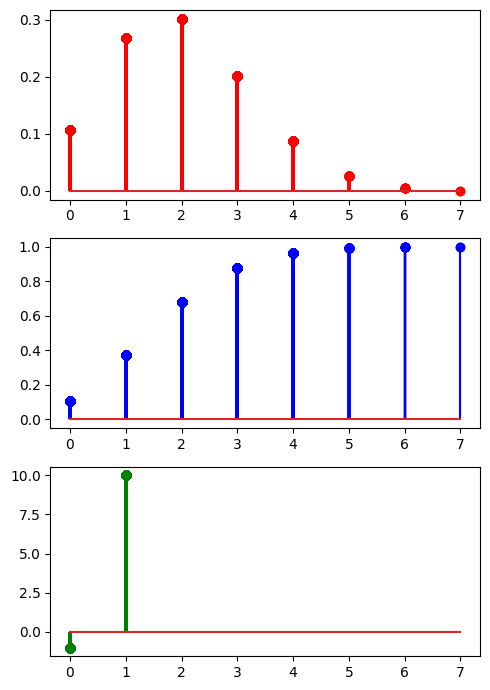

In [91]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [92]:
# Definir todas las funciones de probabilidad relacionadas con esta distribución.
# TODO DISTRIBUCION UNIFORME DISCRETA
from scipy.stats import rv_discrete

# Definir una función para crear la distribución uniforme discreta del dado
def crear_dado(a, b):
    """
    Crea una distribución uniforme discreta para un dado de 'b - a + 1' caras,
    donde los valores van desde 'a' hasta 'b'.
    """
    valores = range(a, b + 1)              # Valores posibles en el dado
    probabilidades = [1 / (b - a + 1)] * (b - a + 1)  # Probabilidad uniforme para cada cara
    return rv_discrete(name='dado', values=(valores, probabilidades))

# Función para PMF (probabilidad puntual)
def pmf_dado(x, a, b):
    """
    Calcula la probabilidad puntual (PMF) de obtener un valor específico 'x' en el rango [a, b].
    """
    dado = crear_dado(a, b)
    return dado.pmf(x)

# Función para CDF (probabilidad acumulada)
def cdf_dado(x, a, b):
    """
    Calcula la probabilidad acumulada (CDF) hasta 'x' en el rango [a, b].
    """
    dado = crear_dado(a, b)
    return dado.cdf(x)

# Función para PPF (cuantil)
def ppf_dado(p, a, b):
    """
    Calcula el valor cuantil correspondiente a la probabilidad 'p' en el rango [a, b].
    """
    dado = crear_dado(a, b)
    return dado.ppf(p)

# Función para RVS (generación de valores aleatorios)
def rvs_dado(n, a, b):
    """
    Genera 'n' valores aleatorios en el rango [a, b] para un dado.
    """
    dado = crear_dado(a, b)
    return dado.rvs(size=n)

# Parámetros de entrada
a, b = 1, 6  # Rango de valores para un dado de 6 caras
x = 4        # Valor específico para PMF y CDF
p = 0.5      # Probabilidad acumulada para PPF
n = 10       # Número de lanzamientos aleatorios

# Imprimir los resultados
print(f"Probabilidad puntual (PMF) de obtener {x} en el rango [{a}, {b}]: {pmf_dado(x, a, b)}")
print(f"Probabilidad acumulada (CDF) de obtener {x} o menos en el rango [{a}, {b}]: {cdf_dado(x, a, b)}")
print(f"Valor cuantil para una probabilidad acumulada de {p} en el rango [{a}, {b}]: {ppf_dado(p, a, b)}")
print(f"{n} tiradas aleatorias en el rango [{a}, {b}]: {rvs_dado(n, a, b)}")


Probabilidad puntual (PMF) de obtener 4 en el rango [1, 6]: 0.16666666666666666
Probabilidad acumulada (CDF) de obtener 4 o menos en el rango [1, 6]: 0.6666666666666666
Valor cuantil para una probabilidad acumulada de 0.5 en el rango [1, 6]: 3.0
10 tiradas aleatorias en el rango [1, 6]: [2 2 6 2 2 5 3 5 1 3]


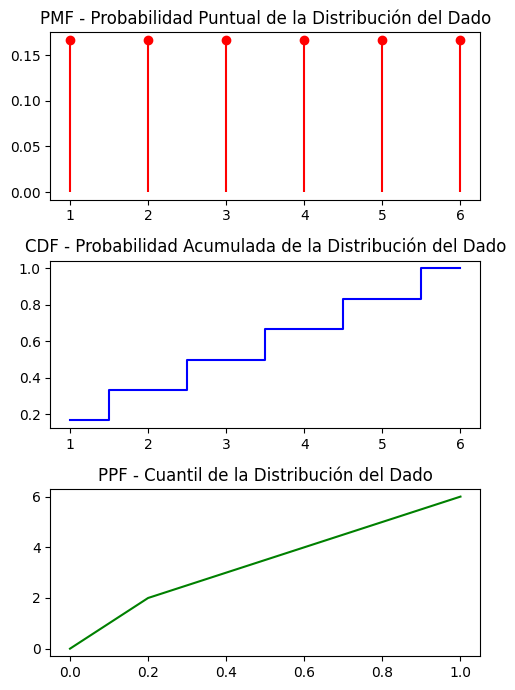

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para el dado
a = 1  # Cara mínima
b = 6  # Cara máxima
data = np.arange(a, b + 1)  # Valores de 1 a 6

# Calcular PMF, CDF y PPF usando las funciones creadas
pmf = [pmf_dado(x, a, b) for x in data]  # PMF para cada valor del dado
cdf = [cdf_dado(x, a, b) for x in data]  # CDF para cada valor del dado
ppf_values = np.linspace(0, 1, len(data))  # Valores de probabilidad para PPF
ppf = [ppf_dado(p, a, b) for p in ppf_values]  # PPF para cada probabilidad acumulada

# Crear los gráficos
fig, axis = plt.subplots(3, 1, figsize=(5, 7))

# Gráfico de PMF
axis[0].stem(data, pmf, "r-", basefmt=" ")
axis[0].set_title("PMF - Probabilidad Puntual de la Distribución del Dado")

# Gráfico de CDF
axis[1].step(data, cdf, "b-", where="mid")
axis[1].set_title("CDF - Probabilidad Acumulada de la Distribución del Dado")

# Gráfico de PPF
axis[2].plot(ppf_values, ppf, "g-")
axis[2].set_title("PPF - Cuantil de la Distribución del Dado")

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [94]:
from scipy.stats import uniform
# TODO DISTRIBUCION UNIFORME CONTINUA
# Densidad de probabilidad (PDF) para la distribución uniforme continua
def pdf_uniform(x, a, b):
    """
    Calcula la densidad de probabilidad (PDF) para una distribución uniforme continua en el intervalo [a, b].
    """
    result = uniform.pdf(x, loc=a, scale=b - a)
    return result

# Probabilidad acumulada (CDF) para la distribución uniforme continua
def cdf_uniform(x, a, b):
    """
    Calcula la probabilidad acumulada (CDF) hasta x para una distribución uniforme continua en el intervalo [a, b].
    """
    result = uniform.cdf(x, loc=a, scale=b - a)
    return result

# Cuantil (PPF) para la distribución uniforme continua
def ppf_uniform(p, a, b):
    """
    Calcula el valor cuantil para una probabilidad acumulada p en una distribución uniforme continua en el intervalo [a, b].
    """
    result = uniform.ppf(p, loc=a, scale=b - a)
    return result

# Generación de valores aleatorios (RVS) para la distribución uniforme continua
def rvs_uniform(n, a, b):
    """
    Genera n valores aleatorios a partir de una distribución uniforme continua en el intervalo [a, b].
    """
    result = uniform.rvs(loc=a, scale=b - a, size=n)
    return result

# Parámetros de la distribución uniforme
a = 0           # Límite inferior
b = 10          # Límite superior
x = 5           # Valor específico para PDF y CDF
p = 0.5         # Probabilidad acumulada para PPF
n = 10          # Número de valores aleatorios

# Imprimir resultados
print(f"Densidad de probabilidad (PDF) en x={x} para U({a}, {b}): {pdf_uniform(x, a, b)}")
print(f"Probabilidad acumulada (CDF) hasta x={x} para U({a}, {b}): {cdf_uniform(x, a, b)}")
print(f"Valor cuantil (PPF) para p={p} en U({a}, {b}): {ppf_uniform(p, a, b)}")
print(f"{n} valores aleatorios de U({a}, {b}): {rvs_uniform(n, a, b)}")




Densidad de probabilidad (PDF) en x=5 para U(0, 10): 0.1
Probabilidad acumulada (CDF) hasta x=5 para U(0, 10): 0.5
Valor cuantil (PPF) para p=0.5 en U(0, 10): 5.0
10 valores aleatorios de U(0, 10): [0.336136   0.62653203 9.06437453 1.39245371 5.32420682 4.11095603
 3.47343326 8.99833346 0.21823397 6.63789686]


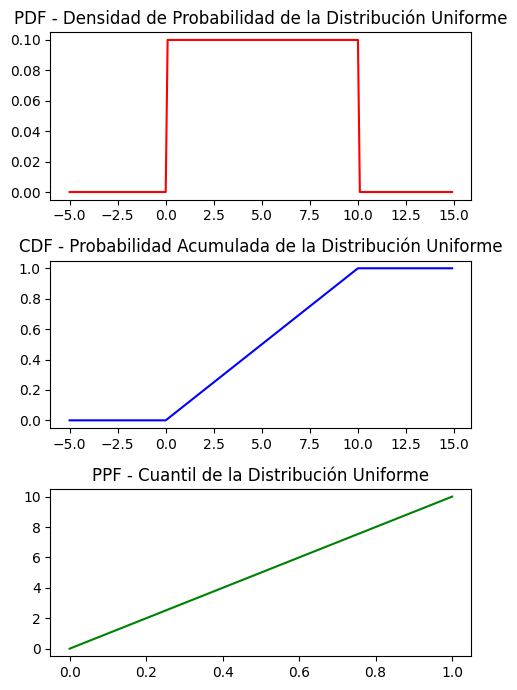

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la distribución uniforme
a = 0           # Límite inferior
b = 10          # Límite superior
data = np.arange(-5, 15, 0.1)  # Valores extendidos para visualizar los bordes

# Calcular PDF, CDF, y PPF usando las funciones creadas
pdf = pdf_uniform(data, a, b)
cdf = cdf_uniform(data, a, b)
ppf_values = np.linspace(0, 1, len(data))  # Valores de probabilidad para PPF
ppf = ppf_uniform(ppf_values, a, b)

# Crear los gráficos
fig, axis = plt.subplots(3, 1, figsize=(5, 7))

# Gráfico de PDF
axis[0].plot(data, pdf, "r-")
axis[0].set_title("PDF - Densidad de Probabilidad de la Distribución Uniforme")

# Gráfico de CDF
axis[1].plot(data, cdf, "b-")
axis[1].set_title("CDF - Probabilidad Acumulada de la Distribución Uniforme")

# Gráfico de PPF
axis[2].plot(ppf_values, ppf, "g-")
axis[2].set_title("PPF - Cuantil de la Distribución Uniforme")

# Ajustar el diseño
plt.tight_layout()
plt.show()


In [96]:
from scipy.stats import norm
#NORMAL
# Densidad de probabilidad (PDF)
def pdf_normal(x, mu, sigma):
    """
    Calcula la densidad de probabilidad (PDF) para una distribución normal.
    """
    result = norm.pdf(x, loc=mu, scale=sigma)
    return result

# Probabilidad acumulada (CDF)
def cdf_normal(x, mu, sigma):
    """
    Calcula la probabilidad acumulada (CDF) para una distribución normal.
    """
    result = norm.cdf(x, loc=mu, scale=sigma)
    return result

# Cuantil (PPF)
def ppf_normal(p, mu, sigma):
    """
    Calcula el valor cuantil para una probabilidad acumulada dada en una distribución normal.
    """
    result = norm.ppf(p, loc=mu, scale=sigma)
    return result

# Generación de valores aleatorios (RVS)
def rvs_normal(n, mu, sigma):
    """
    Genera 'n' valores aleatorios a partir de una distribución normal.
    """
    result = norm.rvs(loc=mu, scale=sigma, size=n)
    return result

# Parámetros de la distribución normal
mu = 0          # Media
sigma = 1       # Desviación estándar
x = 0           # Valor específico para PDF y CDF
p = 0.5         # Probabilidad acumulada para PPF
n = 10          # Número de valores aleatorios

# Imprimir resultados
print(f"Densidad de probabilidad (PDF) en x={x} para N({mu}, {sigma}^2): {pdf_normal(x, mu, sigma)}")
print(f"Probabilidad acumulada (CDF) hasta x={x} para N({mu}, {sigma}^2): {cdf_normal(x, mu, sigma)}")
print(f"Valor cuantil (PPF) para p={p} en N({mu}, {sigma}^2): {ppf_normal(p, mu, sigma)}")
print(f"{n} valores aleatorios de N({mu}, {sigma}^2): {rvs_normal(n, mu, sigma)}")



Densidad de probabilidad (PDF) en x=0 para N(0, 1^2): 0.3989422804014327
Probabilidad acumulada (CDF) hasta x=0 para N(0, 1^2): 0.5
Valor cuantil (PPF) para p=0.5 en N(0, 1^2): 0.0
10 valores aleatorios de N(0, 1^2): [ 0.06699072  0.51593922 -1.56254586 -0.52905268  0.79426468 -1.25428942
  0.29355793 -1.3565818   0.46642998 -0.03564148]


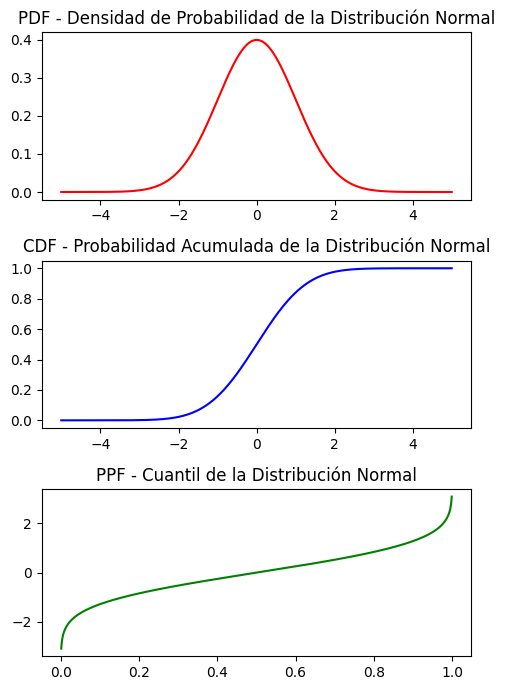

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Parámetros de la distribución normal
mu = 0
sigma = 1
data = np.arange(-5, 5, 0.01)  # Valores de x para PDF y CDF

# Calcular PDF, CDF y PPF usando las funciones creadas
pdf = pdf_normal(data, mu, sigma)
cdf = cdf_normal(data, mu, sigma)
ppf_values = np.linspace(0, 1, len(data))  # Valores de probabilidad para PPF
ppf = ppf_normal(ppf_values, mu, sigma)

# Crear los gráficos
fig, axis = plt.subplots(3, 1, figsize=(5, 7))

# Gráfico de PDF
axis[0].plot(data, pdf, "r-")
axis[0].set_title("PDF - Densidad de Probabilidad de la Distribución Normal")

# Gráfico de CDF
axis[1].plot(data, cdf, "b-")
axis[1].set_title("CDF - Probabilidad Acumulada de la Distribución Normal")

# Gráfico de PPF
axis[2].plot(ppf_values, ppf, "g-")
axis[2].set_title("PPF - Cuantil de la Distribución Normal")

# Ajustar el diseño
plt.tight_layout()
plt.show()


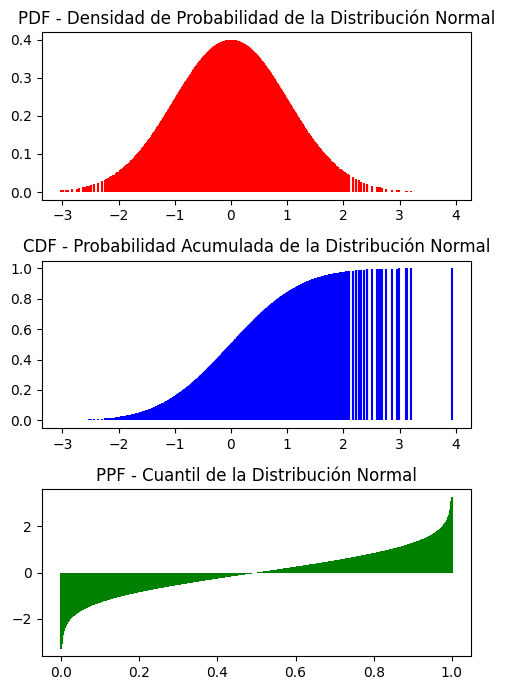

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros de la distribución normal
mu = 0
sigma = 1

# Generar 2000 datos de una distribución normal
data = np.random.normal(mu, sigma, 2000)

# Calcular PDF, CDF y PPF
pdf = norm.pdf(data, loc=mu, scale=sigma)
cdf = norm.cdf(data, loc=mu, scale=sigma)
ppf_values = np.linspace(0, 1, 2000)  # Valores de probabilidad para PPF
ppf = norm.ppf(ppf_values, loc=mu, scale=sigma)

# Crear los gráficos
fig, axis = plt.subplots(3, 1, figsize=(5, 7))

# Gráfico de PDF
axis[0].stem(data, pdf, "r-", markerfmt=" ", basefmt=" ")
axis[0].set_title("PDF - Densidad de Probabilidad de la Distribución Normal")

# Gráfico de CDF
axis[1].stem(data, cdf, "b-", markerfmt=" ", basefmt=" ")
axis[1].set_title("CDF - Probabilidad Acumulada de la Distribución Normal")

# Gráfico de PPF
axis[2].stem(ppf_values, ppf, "g-", markerfmt=" ", basefmt=" ")
axis[2].set_title("PPF - Cuantil de la Distribución Normal")

# Ajustar la visualización
plt.tight_layout()
plt.show()

